In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Car Sales.xlsx - car_data.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
data.shape

(23906, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
data.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Annual Income,Price ($),Phone
count,2.390500e+04,23905.000000,2.390500e+04
mean,8.308466e+05,28089.540473,7.497753e+06
std,7.200208e+05,14788.592495,8.675080e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746465e+06
50%,7.350000e+05,23000.000000,7.496199e+06
75%,1.176000e+06,34000.000000,8.248172e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [12]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [13]:
numerical = []
categorical = []

for col in df.columns:
    if df[col].dtype == 'O':
        categorical.append(col)
    else:
        numerical.append(col)

In [14]:
print(numerical)
print(categorical)

['Annual Income', 'Price ($)', 'Phone']
['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']


In [15]:
df.rename(columns={'Annual Income':'annual_income','Price ($)':'price','Customer Name':'Customer_name','Body Style':"Body_style"},inplace = True)

In [16]:
df.columns

Index(['Car_id', 'Date', 'Customer_name', 'Gender', 'annual_income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'price', 'Dealer_No ', 'Body_style', 'Phone', 'Dealer_Region'],
      dtype='object')

# Sales Performance Analysis

1. **What is the total revenue generated by each dealer?**
   
2. **Which dealer has the highest number of sales?**

3. **What is the average price of cars sold by each dealer?**


In [17]:
# minimum price
min_price = df.price.min()
print("minimum price is :" "$" +str(min_price))

minimum price is :$1200


In [18]:
#maximum price 
max_price = df.price.max()
print("maximum price is :" "$" +str(max_price))

maximum price is :$85800


In [19]:
#average price
avg_price = df.price.mean()
print("average price is:" "$"+str(avg_price))

average price is:$28089.540472704455


In [20]:

#What is the total revenue generated by each dealer?


total_sales_by_dealer = df.groupby('Dealer_Name').agg(total_revenue = ("price",'sum'))

total_sales_by_dealer.sort_values(by ="total_revenue", ascending =False).total_revenue.nlargest(10)
     

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Scrivener Performance Engineering                  35258525
Saab-Belle Dodge                                   35220865
Star Enterprises Inc                               35113206
Tri-State Mack Inc                                 35091357
Suburban Ford                                      34943473
Ryder Truck Rental and Leasing                     34837906
Name: total_revenue, dtype: int64

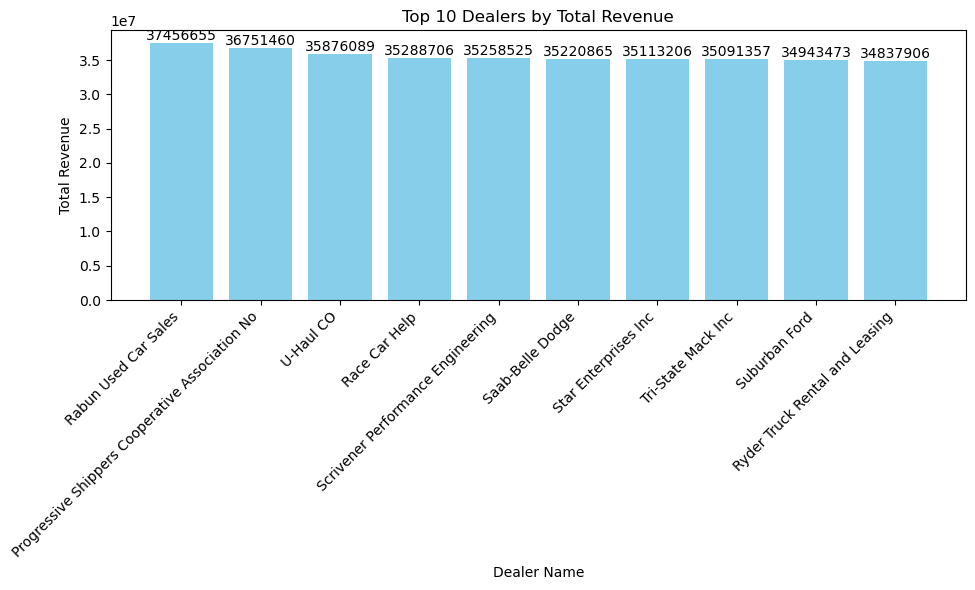

In [21]:
import matplotlib.pyplot as plt

# Get the top 10 dealers by total revenue
top_10_dealers = total_sales_by_dealer.sort_values(by="total_revenue", ascending=False).total_revenue.nlargest(10)

# Plot the data using plt.bar() for a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_dealers.index, top_10_dealers.values, color='skyblue')

# Add annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Top 10 Dealers by Total Revenue')
plt.xlabel('Dealer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



In [22]:

#What is the average price of cars sold by each dealer?

avg_sales_by_dealer = df.groupby('Dealer_Name').agg(avg_revenue=('price','mean'))
top_10_avg_dealer = avg_sales_by_dealer.sort_values(by='avg_revenue', ascending = False).avg_revenue.nlargest(10)
top_10_avg_dealer

Dealer_Name
U-Haul CO                            28769.919006
Classic Chevy                        28602.014446
Rabun Used Car Sales                 28527.536177
Iceberg Rentals                      28522.958533
Enterprise Rent A Car                28312.580800
Scrivener Performance Engineering    28297.371589
Gartner Buick Hyundai Saab           28247.621019
Capitol KIA                          28189.703822
Saab-Belle Dodge                     28176.692000
Race Car Help                        28163.372706
Name: avg_revenue, dtype: float64

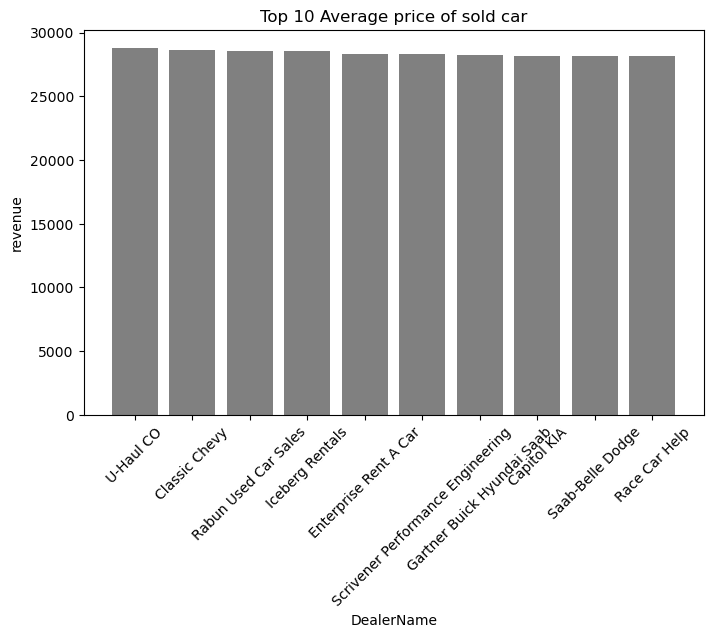

In [23]:
plt.figure (figsize = (8,5))
plt.bar(top_10_avg_dealer.index,top_10_avg_dealer.values,color = 'grey')
plt.title('Top 10 Average price of sold car')
plt.ylabel('revenue')
plt.xlabel('DealerName')
plt.xticks(rotation = 45)
plt.show()

# Customer Demographics and Behavior

1. **What is the gender distribution of customers?**
2. **What is the distribution of customers based on the dealer regions?**
3. **What is the average annual income of customers?**

In [24]:
#What is the gender distribution of customers?
genders = df.Gender.value_counts()
genders
# gen = df.groupby('Gender')['Gender'].count()
# gen

Gender
Male      18797
Female     5108
Name: count, dtype: int64

In [25]:
gen = df.groupby('Gender')['Gender'].count()
gen

Gender
Female     5108
Male      18797
Name: Gender, dtype: int64

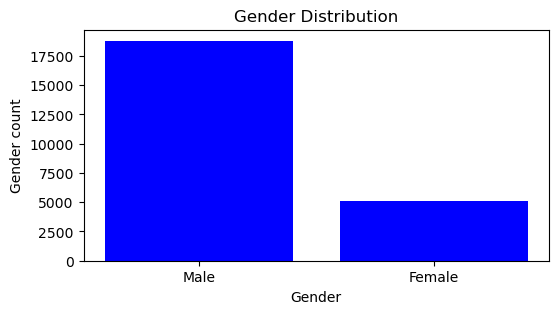

In [26]:
plt.figure (figsize = (6,3))
plt.bar(genders.index,genders.values,color = 'blue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Gender count')
plt.show()

In [27]:
# What is the distribution of customers based on the dealer regions?

Dealer_regions = df.Dealer_Region.value_counts()
Dealer_regions

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Middletown    3128
Greenville    3128
Name: count, dtype: int64

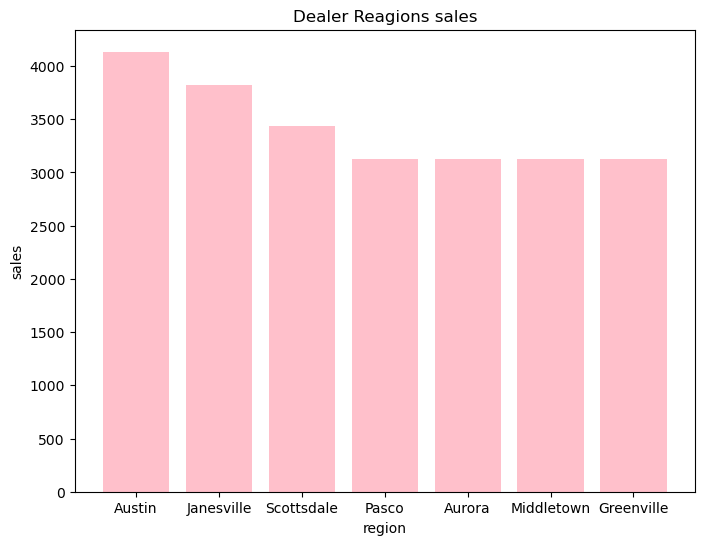

In [28]:
plt.figure(figsize=(8,6))
plt.bar(Dealer_regions.index,Dealer_regions.values,color = 'pink')
plt.title('Dealer Reagions sales')
plt.xlabel('region')
plt.ylabel('sales')
plt.show()

In [29]:
# What is the average annual income of customers?
average_income = df['annual_income'].mean()

print(f"The average annual income of customers is: {average_income}")



The average annual income of customers is: 830846.5951056264


# 3. Model and Company Insights

1. **What are the top 5 most popular car models?**
2. **Which company has the highest sales volume?**
3. **What is the average price of cars from each company?**

In [30]:
# 1. **What are the top 5 most popular car models?**
Popular_car = df.Model.value_counts().nlargest(5)
Popular_car

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Jetta         382
Name: count, dtype: int64

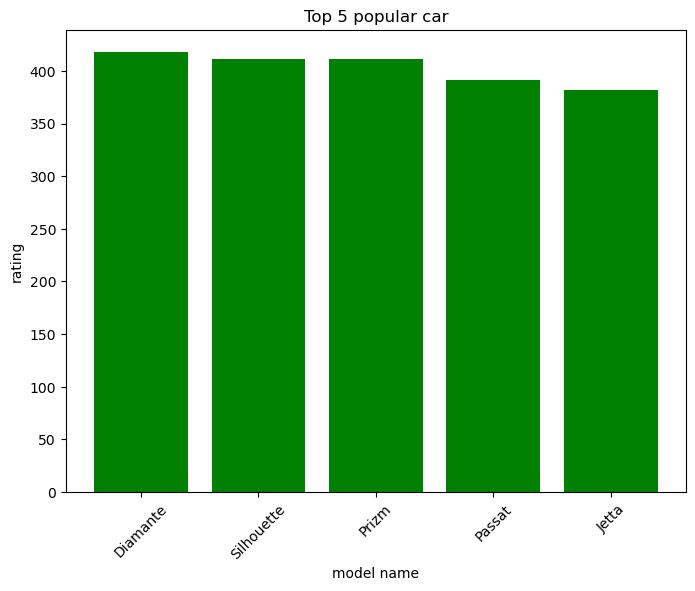

In [31]:
plt.figure(figsize = (8,6))
plt.bar(Popular_car.index,Popular_car.values,color = 'green')
plt.title('Top 5 popular car')
plt.xlabel('model name')
plt.ylabel('rating')
plt.xticks(rotation = 45)
plt.show()

In [32]:
# 2. **Which company has the highest sales volume?**
highest_sale = df.Company.value_counts().nlargest(1)
highest_sale


Company
Chevrolet    1819
Name: count, dtype: int64

In [33]:
# 3. **What is the average price of cars from each company?**

average_price = df.groupby("Company").agg(average_price_car = ('price','mean')).average_price_car.nlargest(10)
average_price.round()
# avg_price_car_comp =  df.groupby('Company').agg(average_price_car = ('price','mean')).average_price_car.nlargest(10)
# avg_price_car_comp.round()

Company
Cadillac      40972.0
Saab          36516.0
Lexus         34025.0
Buick         33634.0
Oldsmobile    31894.0
Lincoln       31407.0
Saturn        31093.0
Toyota        29513.0
Plymouth      29405.0
Pontiac       29358.0
Name: average_price_car, dtype: float64

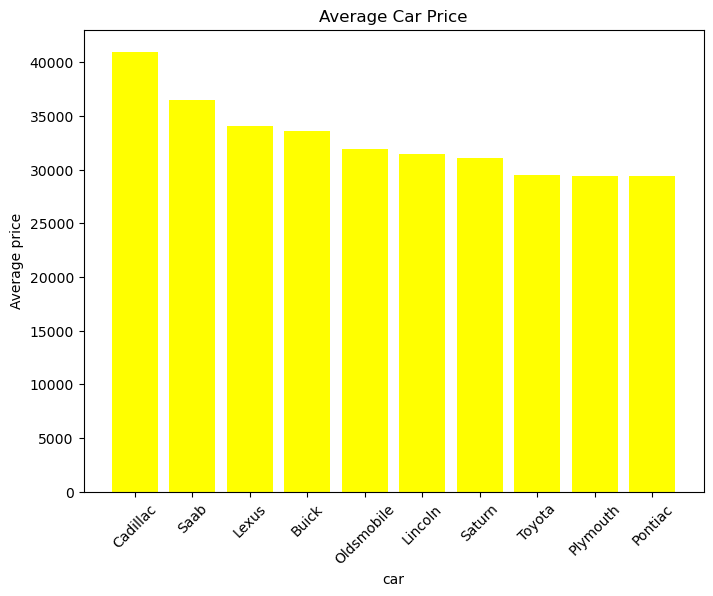

In [34]:
plt.figure(figsize = (8,6))
plt.bar(average_price.index,average_price.values,color = 'yellow')
plt.title('Average Car Price')
plt.xlabel('car')
plt.ylabel('Average price')
plt.xticks(rotation = 45)
plt.show()

In [35]:
df.columns

Index(['Car_id', 'Date', 'Customer_name', 'Gender', 'annual_income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'price', 'Dealer_No ', 'Body_style', 'Phone', 'Dealer_Region'],
      dtype='object')

# 4. Regional Analysis
1. **Which dealer region has the highest sales revenue?**
2. **What is the sales performance comparison between different dealer regions?**
3. **How does the average car price vary across different regions?**

In [36]:
# Which dealer region has the highest sales revenue?

Dealer_region_with_highest_sale = df.groupby("Dealer_Region").agg(total_sales = ('price',"sum"))
Dealer_region_with_highest_sale = Dealer_region_with_highest_sale.sort_values(by = 'total_sales',ascending = False)
regions = Dealer_region_with_highest_sale.index.tolist()
sales = Dealer_region_with_highest_sale['total_sales'].tolist()

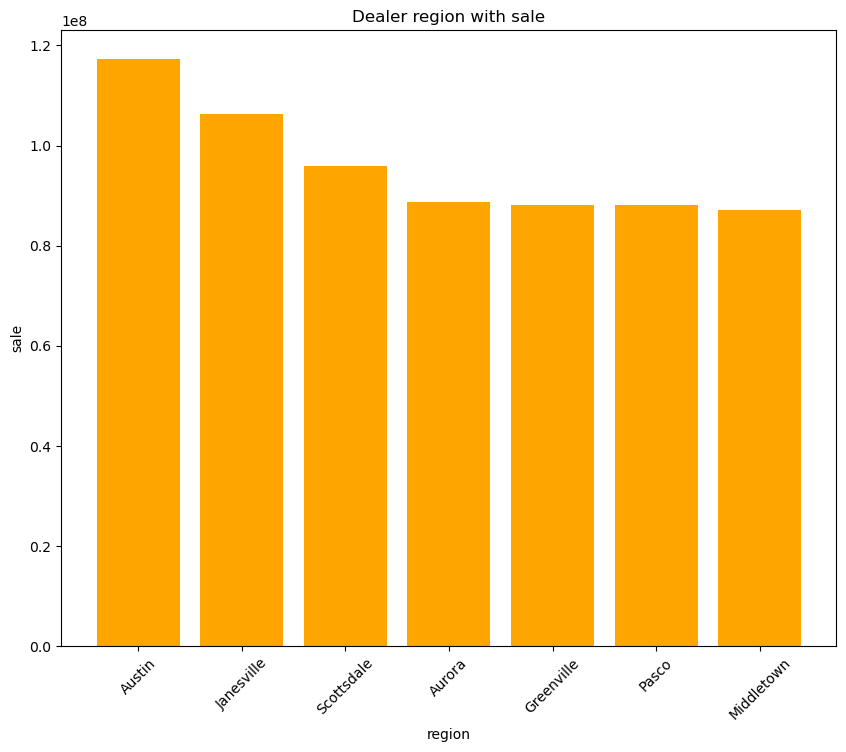

In [37]:
plt.figure(figsize = (10,8))
plt.bar(regions,sales,color = 'orange')
plt.title('Dealer region with sale')
plt.xlabel('region')
plt.ylabel('sale')
plt.xticks(rotation = 45)
plt.show()

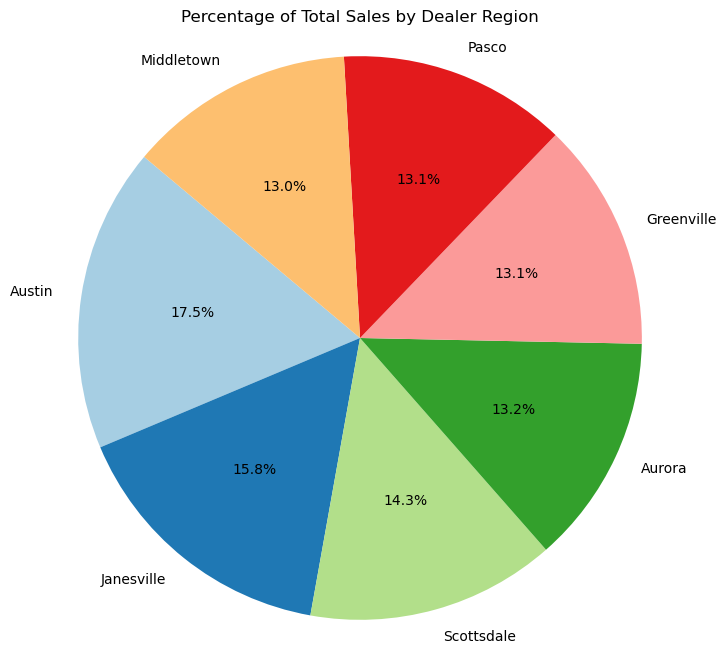

In [38]:


# Pie chart for sales contribution by region
plt.figure(figsize=(8,8))
plt.pie(sales, labels=regions, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add title
plt.title('Percentage of Total Sales by Dealer Region')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.show()


In [39]:
# 2.What is the sales performance comparison between different dealer regions?

sales_performance = df.groupby('Dealer_Region').agg(total_sales = ('price','sum'),avg_sales = ('price','mean'),number_of_sales=('Car_id','count'))
sales_performance

,total_sales,avg_sales,number_of_sales
Dealer_Region,,,
Aurora,88642382,28329.300735,3129
Austin,117192531,28341.603628,4135
Greenville,88149602,28180.819054,3128
Janesville,106351234,27833.350955,3821
Middletown,87134628,27856.338875,3128
Pasco,88040714,28119.039923,3131
Scottsdale,95969374,27954.958928,3433


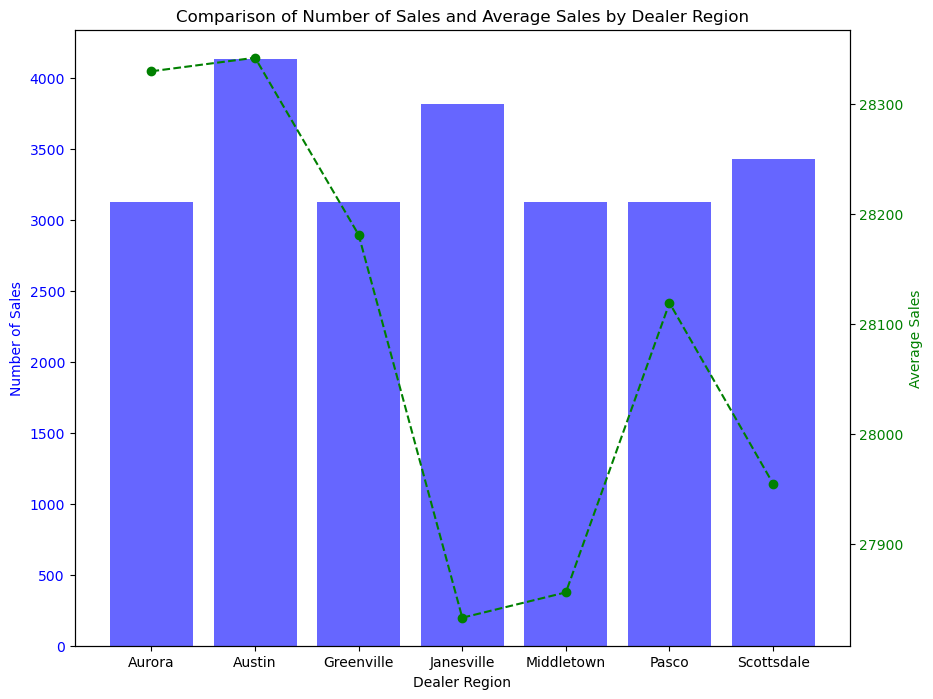

In [40]:
# Bar chart comparing number of sales and average sales
fig, ax1 = plt.subplots(figsize=(10,8))

# Number of sales (left y-axis)
ax1.set_xlabel('Dealer Region')
ax1.set_ylabel('Number of Sales', color='blue')
ax1.bar(sales_performance.index, sales_performance['number_of_sales'], color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')

# Average sales (right y-axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Average Sales', color='green')
ax2.plot(sales_performance.index, sales_performance['avg_sales'], color='green', marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor='green')

# Title and rotate x-ticks
plt.title('Comparison of Number of Sales and Average Sales by Dealer Region')
plt.xticks(rotation=45)

plt.show()


In [41]:
# How does the average car price vary across different regions?
avg_car_price_region = df.groupby('Dealer_Region').agg(average_price =  ('price','mean'))
avg_car_price_region.round()

,average_price
Dealer_Region,
Aurora,28329.0
Austin,28342.0
Greenville,28181.0
Janesville,27833.0
Middletown,27856.0
Pasco,28119.0
Scottsdale,27955.0


5. Engine and Transmission Preferences
What is the distribution of engine types among sold cars?
What percentage of cars sold have automatic vs. manual transmission?

In [42]:

#What is the distribution of engine types among sold cars?
distribution_engine = df.Engine.value_counts()
distribution_engine
     

Engine
DoubleÂ Overhead Camshaft    12570
Overhead Camshaft            11335
Name: count, dtype: int64

In [43]:

#What percentage of cars sold have automatic vs. manual transmission?

automatic_manual = df.Transmission.value_counts()
print(automatic_manual)
total = automatic_manual.sum()
print("")
find_percentage = (automatic_manual / total)*100
find_percentage
     

Transmission
Auto      12570
Manual    11335
Name: count, dtype: int64



Transmission
Auto      52.583142
Manual    47.416858
Name: count, dtype: float64

6. Color and Body Style Trends
What are the top 3 most popular car colors?
What is the distribution of body styles among sold cars?

In [44]:

#What are the top 3 most popular car colors
popular_car_color = df.Color.value_counts().nlargest(3)
popular_car_color
     

Color
Pale White    11255
Black          7857
Red            4793
Name: count, dtype: int64

In [45]:
#What is the distribution of body styles among sold cars?
body_style_dist = df.Body_style.value_counts()
body_style_dist

Body_style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64

In [46]:
# 7. Dealer Performance
# What is the total number of sales made by each dealer?
# Which dealer has the highest average sales price?

In [47]:
df.columns

Index(['Car_id', 'Date', 'Customer_name', 'Gender', 'annual_income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'price', 'Dealer_No ', 'Body_style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [48]:

#What is the total number of sales made by each dealer?
each_dealer = df.groupby("Dealer_Name").agg(total_sales = ("price", 'sum'))
each_dealer.sort_values(by ="total_sales", ascending=False)

,total_sales
Dealer_Name,
Rabun Used Car Sales,37456655
Progressive Shippers Cooperative Association No,36751460
U-Haul CO,35876089
Race Car Help,35288706
Scrivener Performance Engineering,35258525
Saab-Belle Dodge,35220865
Star Enterprises Inc,35113206
Tri-State Mack Inc,35091357
Suburban Ford,34943473


In [49]:

#Which dealer has the highest average sales price
each_dealer_avg= df.groupby("Dealer_Name").agg(avg_Sales = ("price", 'mean'))
each_dealer_avg.sort_values(by ="avg_Sales", ascending=False)

,avg_Sales
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Capitol KIA,28189.703822
Saab-Belle Dodge,28176.692000
